<a href="https://colab.research.google.com/github/kannamReshma/mini-project/blob/main/Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# miniproject on image 
# Data : images

!pip install ipython-autotime
%load_ext autotime

time: 241 µs (started: 2021-05-23 17:17:30 +00:00)


In [3]:
# Reference path :/content/drive/MyDrive
# Displaying the image :/content/drive/MyDrive/images

# Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/images'
CATEGORIES = ['people with mask','people without mask']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)#label encoding the images
  path = os.path.join(DATADIR,category)#create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 29.3 s (started: 2021-05-23 17:17:40 +00:00)


In [4]:
flat_data[0]

array([0.26355556, 0.30960719, 0.34352876, ..., 0.61938562, 0.62330719,
       0.63115033])

time: 8.17 ms (started: 2021-05-23 17:18:15 +00:00)


In [ ]:
#len(flat_data[0])

time: 1.55 ms (started: 2021-05-18 11:36:30 +00:00)


In [ ]:
#150*150*3

time: 889 µs (started: 2021-05-18 11:36:30 +00:00)


In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 4.81 ms (started: 2021-05-23 17:18:17 +00:00)


<BarContainer object of 2 artists>

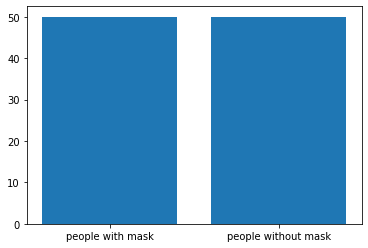

time: 156 ms (started: 2021-05-23 17:18:22 +00:00)


In [6]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [7]:
# split data into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 202 ms (started: 2021-05-23 17:18:27 +00:00)


In [8]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

time: 73.6 ms (started: 2021-05-23 17:18:31 +00:00)


In [9]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

time: 875 ms (started: 2021-05-23 17:18:36 +00:00)


In [10]:
y_test


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1])

time: 10.7 ms (started: 2021-05-23 17:18:43 +00:00)


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

time: 1.33 ms (started: 2021-05-23 17:18:51 +00:00)


In [12]:
confusion_matrix(y_pred,y_test)

array([[12, 10],
       [ 1,  7]])

time: 13.5 ms (started: 2021-05-23 17:18:58 +00:00)


In [13]:
accuracy_score(y_pred,y_test)

0.6333333333333333

time: 4.62 ms (started: 2021-05-23 17:19:04 +00:00)


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[0.1,1,10,100],'kernel':['linear','rbf']}
]

#svc=svm.SVC(probability=True)
grid=GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 18.3 s (started: 2021-05-23 17:19:09 +00:00)


In [15]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

time: 3.75 ms (started: 2021-05-23 17:19:33 +00:00)


In [16]:
from sklearn.svm import SVC
from sklearn import svm
model=svm.SVC(kernel='linear',C=0.1,gamma='auto',probability=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1])

time: 2.69 s (started: 2021-05-23 17:19:37 +00:00)


In [17]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1])

time: 3.99 ms (started: 2021-05-23 17:19:44 +00:00)


In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.43 ms (started: 2021-05-23 17:19:48 +00:00)


In [19]:
confusion_matrix(y_pred,y_test)

array([[10,  6],
       [ 3, 11]])

time: 11.9 ms (started: 2021-05-23 17:19:52 +00:00)


In [20]:
accuracy_score(y_pred,y_test)

0.7

time: 5.95 ms (started: 2021-05-23 17:19:56 +00:00)


In [21]:
#save the model using pickel library
import pickle
pickle.dump(grid,open('img_model.p','wb'))

time: 54.6 ms (started: 2021-05-23 17:20:01 +00:00)


In [22]:
model=pickle.load(open('img_model.p','rb'))

time: 45.5 ms (started: 2021-05-23 17:20:07 +00:00)


Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWUXEoHyYyWNDapRb_1LS7EteNtlNIDhQGkA&usqp=CAU
PREDICTED OUTPUT:people with mask


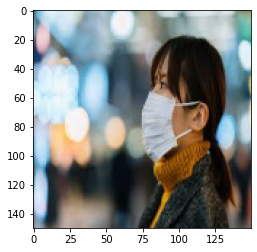

time: 13.9 s (started: 2021-05-23 17:20:12 +00:00)


In [23]:
#testing a brand new image
flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [ ]:
#https://ichef.bbci.co.uk/news/400/cpsprodpb/E907/production/_110755695_gettyimages-1202072951.jpg

In [24]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok


     |████████████████████████████████| 8.2MB 31.1MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 112kB 50.3MB/s 
     |████████████████████████████████| 174kB 46.4MB/s 
     |████████████████████████████████| 4.2MB 37.1MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 122kB 41.4MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
time: 18 s (started: 2021-05-23 17:20:36 +00:00)


In [26]:
#Deployment
%%writefile app.py
import streamlit as st
#import os
#import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier using Classifier')
st.text('Upload the image')

model=pickle.load(open('img_model.p','rb'))

uploaded_file=st.file_uploader("choose an image...",type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES=['people with mask','people without mask']
    st.write('Result...')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out=model.predict(flat_data)
    y_out=CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT:{y_out}')
  q=model.predict_proba(flat_data)
  for index,item in enumerate(CATEGORIES):
    st.write(f'{item}:{q[0][index]*100}%')

Overwriting app.py
time: 3.88 ms (started: 2021-05-23 17:21:43 +00:00)


In [27]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
http://b9baba65feba.ngrok.io
time: 1.27 s (started: 2021-05-23 17:21:48 +00:00)


In [28]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
confusion_matrix(y_pred,y_test)
accuracy_score(y_pred,y_test)

0.6666666666666666

time: 21.3 s (started: 2021-05-23 17:22:07 +00:00)
